In [1]:
#pip install yfinance

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from sklearn.linear_model import LinearRegression
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yfin
yfin.pdr_override()

In [3]:
start_date = dt.datetime(2019,1,1)      # year, month and day
ende_date=dt.datetime(2021,1,1)
data = pdr.get_data_yahoo('AAPL',start_date,ende_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.943253,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.163818,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.622257,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.542969,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.220524,164101200


In [4]:
print('Numero de registros',data.shape[0],'y numero de columnas',data.shape[1])

Numero de registros 505 y numero de columnas 6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2019-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       505 non-null    float64
 1   High       505 non-null    float64
 2   Low        505 non-null    float64
 3   Close      505 non-null    float64
 4   Adj Close  505 non-null    float64
 5   Volume     505 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [6]:
data.index # dtpe= datetime64

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

Numpy

In [7]:
data_array = data.to_numpy()
data_array

array([[3.87224998e+01, 3.97125015e+01, 3.85574989e+01, 3.94799995e+01,
        3.79432526e+01, 1.48158800e+08],
       [3.59949989e+01, 3.64300003e+01, 3.55000000e+01, 3.55475006e+01,
        3.41638184e+01, 3.65248800e+08],
       [3.61324997e+01, 3.71375008e+01, 3.59500008e+01, 3.70649986e+01,
        3.56222572e+01, 2.34428400e+08],
       ...,
       [1.38050003e+02, 1.38789993e+02, 1.34339996e+02, 1.34869995e+02,
        1.32703964e+02, 1.21047300e+08],
       [1.35580002e+02, 1.35990005e+02, 1.33399994e+02, 1.33720001e+02,
        1.31572479e+02, 9.64521000e+07],
       [1.34080002e+02, 1.34740005e+02, 1.31720001e+02, 1.32690002e+02,
        1.30559006e+02, 9.91166000e+07]])

In [8]:
data_array.shape
#len(data_array)

(505, 6)

In [9]:
data.head(1) # igual a data_array[0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.7225,39.712502,38.557499,39.48,37.943253,148158800


In [10]:
data_array.dtype # Solo muestra un tipo de dato en la matriz numpy

dtype('float64')

In [11]:
muestra = data_array[:10,0].copy() # [filas, columnas(en este caso el indice=fecha asi que no lo cuenta)]
muestra

array([38.72249985, 35.99499893, 36.13249969, 37.17499924, 37.38999939,
       37.82249832, 38.125     , 38.22000122, 37.71250153, 37.56750107])

In [12]:
data['Open'][:10]
#data.loc[data.index[1:10].values, data['Open']] error [fila,columna]

Date
2019-01-02    38.722500
2019-01-03    35.994999
2019-01-04    36.132500
2019-01-07    37.174999
2019-01-08    37.389999
2019-01-09    37.822498
2019-01-10    38.125000
2019-01-11    38.220001
2019-01-14    37.712502
2019-01-15    37.567501
Name: Open, dtype: float64

In [13]:
np.max(muestra) # igual a muestra.max() y muestra[muestra.argmax()] , argmax() indica el indice del numero maximo

38.72249984741211

In [14]:
print(35.994999/ 38.722500)
data/data.shift()  # shift(1) muestra la informacion empezando en una posicion hacia abajo


0.9295628897927563


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.929563,0.917343,0.920703,0.900393,0.900392,2.465252
2019-01-04,1.003820,1.019421,1.012676,1.042689,1.042690,0.641832
2019-01-07,1.028852,1.001885,1.014604,0.997774,0.997774,0.934662
2019-01-08,1.005783,1.020090,1.017958,1.019063,1.019063,0.748940
...,...,...,...,...,...,...
2020-12-24,0.993644,1.007778,1.002447,1.007712,1.007712,0.622623
2020-12-28,1.020332,1.029072,1.018383,1.035766,1.035766,2.266266
2020-12-29,1.030301,1.010558,1.006217,0.986685,0.986685,0.972375


In [15]:
np.sum(np.log(data/data.shift()))

# Otra forma:
#np.log(data/data.iloc[0]).tail(1)

Open         1.242016
High         1.221681
Low          1.228528
Close        1.212221
Adj Close    1.235734
Volume      -0.401988
dtype: float64

Portafolio

In [16]:
tickers =['AAPL','WMT','MSFT','IBM','NKE']
start_date= dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start_date)['Adj Close']
data.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,IBM,MSFT,NKE,WMT
Date,,,,,
2020-01-02,73.249023,107.512405,155.093643,98.803734,112.085152
2020-01-03,72.536880,106.654976,153.162476,98.533020,111.095665
2020-01-06,73.114876,106.464439,153.558380,98.446014,110.869476
2020-01-07,72.771019,106.535881,152.158279,98.397682,109.842300
2020-01-08,73.941620,107.425087,154.581894,98.175346,109.465355


In [17]:
portafolio = [0.25,0.15,.25,.1,.25]
np.sum(portafolio)

1.0

Normalización

Establecer el punto de comparacion inicial de las tendencias

In [18]:
# Valores iniciales
data.iloc[0]

AAPL     73.249023
IBM     107.512405
MSFT    155.093643
NKE      98.803734
WMT     112.085152
Name: 2020-01-02 00:00:00, dtype: float64

In [19]:
data/data.iloc[0]

,AAPL,IBM,MSFT,NKE,WMT
Date,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.990278,0.992025,0.987548,0.997260,0.991172
2020-01-06,0.998169,0.990253,0.990101,0.996379,0.989154
2020-01-07,0.993474,0.990917,0.981074,0.995890,0.979990
2020-01-08,1.009455,0.999188,0.996700,0.993640,0.976627
...,...,...,...,...,...
2023-08-24,2.407950,1.335195,2.063076,0.988121,1.399739
2023-08-25,2.438394,1.351937,2.082484,1.000367,1.408037
2023-08-28,2.459965,1.358169,2.087126,1.008363,1.416066


In [20]:
investment= 1000
# (data/data.iloc[0])*portafolio                # En proporciones
(data/data.iloc[0])*portafolio*investment       # En valores monetarios por proporciones invertidas

,AAPL,IBM,MSFT,NKE,WMT
Date,,,,,
2020-01-02,250.000000,150.000000,250.000000,100.000000,250.000000
2020-01-03,247.569446,148.803725,246.887094,99.726009,247.793002
2020-01-06,249.542152,148.537891,247.525264,99.637949,247.288500
2020-01-07,248.368564,148.637565,245.268401,99.589032,244.997439
2020-01-08,252.363842,149.878174,249.175096,99.364004,244.156682
...,...,...,...,...,...
2023-08-24,601.987564,200.279218,515.769045,98.812052,349.934842
2023-08-25,609.598573,202.790560,520.620969,100.036702,352.009176
2023-08-28,614.991142,203.725333,521.781560,100.836267,354.016564


In [21]:
rendimientos=(data/data.iloc[0])*portafolio
# data.shape[0] =772
print(rendimientos.iloc[771])
np.sum(rendimientos.iloc[771])       # rendimiento de 49.79% en 2 años

AAPL    0.482113
IBM     0.189216
MSFT    0.385218
NKE     0.127571
WMT     0.313874
Name: 2023-01-25 00:00:00, dtype: float64


1.4979917108164424

In [22]:
weight = np.random.random(4)        # Suma diferent a 1
weight /= weight.sum()
print(weight)
print(np.sum(weight)) # SUma de las proporciones igual a 1 , igual a print(sum(weight))

[0.33069878 0.27377314 0.1685769  0.22695119]
1.0


# Volatilidad

Average True Range(ATR):

Es un indicador de volatilidad del mercado utilizado en el análisis técnico al descomponer el rango completo del precio de un activo para ese período. El ATR es entonces un promedio móvil, generalmente usando 14 días, de los rangos reales. Los Traders pueden usar períodos más cortos que 14 días para generar más señales de negociación, mientras que los períodos más largos tienen una mayor probabilidad de generar menos señales  de negociación. ATR muestra a los inversores el rango de precios promedio que oscila para una inversión durante un período específico.


 Una acción que experimenta un alto nivel de volatilidad tiene un ATR más alto y un ATR más bajo indica una volatilidad más baja para el período evaluado. Los técnicos de mercado pueden utilizar el ATR para ingresar y salir de operaciones y es una herramienta útil para agregar a un sistema de negociación. El indicador no indica la dirección del precio; en cambio, se usa principalmente para medir la volatilidad causada por las brechas y limitar los movimientos hacia arriba o hacia abajo

In [23]:
data = pdr.get_data_yahoo('AAPL','2020-1-1')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249031,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536888,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114891,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941643,132079200


In [24]:
print('Maximo valor - minimo valor:',75.150002-73.797501)
print('Maximo valor - cierre anterior:',75.144997	-75.087502)
print('Minimo valor - cierre anterior:',np.abs(74.125000-75.087502))

Maximo valor - minimo valor: 1.3525010000000037
Maximo valor - cierre anterior: 0.05749500000000296
Minimo valor - cierre anterior: 0.9625020000000006


In [25]:
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())  #con sifht movemos la columna un reglon abajo
low_cp = np.abs(data['Low'] - data['Close'].shift())

df = pd.concat([high_low,high_cp,low_cp], axis =1)
df

,0,1,2
Date,,,
2020-01-02,1.352501,NaN,NaN
2020-01-03,1.019997,0.057495,0.962502
2020-01-06,1.802498,0.632500,1.169998
2020-01-07,0.854996,0.275002,0.579994
2020-01-08,1.820000,1.512497,0.307503
...,...,...,...
2023-08-24,5.090012,0.019989,5.110001
2023-08-25,3.329987,2.769989,0.559998
2023-08-28,2.039993,1.979996,0.059998


In [26]:
TR = np.max(df, axis=1)     # valor maximo por filas
TR

Date
2020-01-02    1.352501
2020-01-03    1.019997
2020-01-06    1.802498
2020-01-07    0.854996
2020-01-08    1.820000
                ...   
2023-08-24    5.110001
2023-08-25    3.329987
2023-08-28    2.039993
2023-08-29    5.399994
2023-08-30    3.730011
Length: 922, dtype: float64

In [27]:
''' rolling() :proporciona la función de cálculos de ventana móvil. El concepto de cálculo de ventana móvil se utiliza principalmente en el
 procesamiento de señales y datos de series temporales. Tomamos un tamaño de ventana de k a la vez y realizamos
alguna operación matemática deseada en él, por ejemplo media movil. Una ventana de tamaño k significa k valores consecutivos a la vez '''
ATR = TR.rolling(14).mean() # igual a true_range.rolling(14).sum()/14
ATR

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2023-08-24    3.234998
2023-08-25    3.059998
2023-08-28    3.013568
2023-08-29    3.119282
2023-08-30    3.160712
Length: 922, dtype: float64

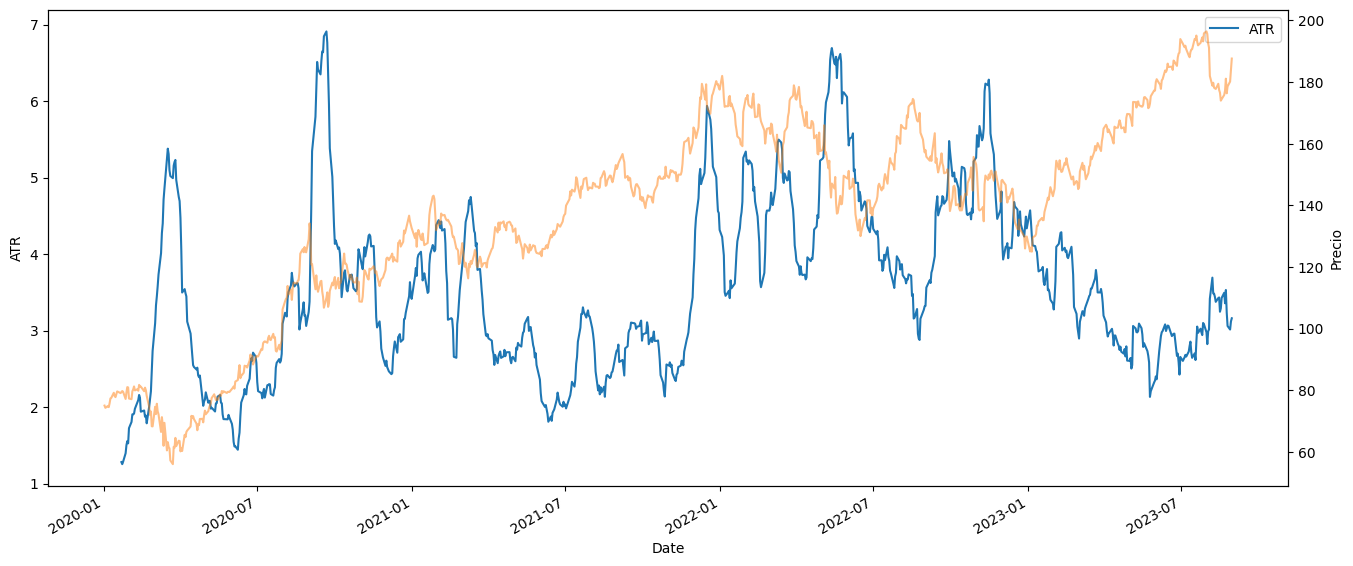

In [28]:
fig, ax = plt.subplots(figsize=(16,7))
ax1 = ATR.plot(ax=ax, label='ATR')
ax2 = data['Close'].plot(ax=ax, secondary_y=True, alpha=.5, label='Close')
ax1.set_ylabel("ATR")
ax2.set_ylabel("Precio")
ax.legend()

# Sharpe ratio

Representa tanto el riesgo como la rentabilidad

In [29]:
tickers =['AAPL','WMT','MSFT','IBM','NKE']
start_date= dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start_date)['Adj Close']
data.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,IBM,MSFT,NKE,WMT
Date,,,,,
2020-01-02,73.249008,107.512413,155.093658,98.803726,112.085152
2020-01-03,72.536903,106.654991,153.162506,98.533020,111.095657
2020-01-06,73.114876,106.464447,153.558350,98.446014,110.869484
2020-01-07,72.771027,106.535866,152.158279,98.397675,109.842300
2020-01-08,73.941635,107.425079,154.581909,98.175308,109.465355


In [30]:
portafolio = [0.25,0.15,.25,.1,.25]
np.sum(portafolio)

1.0

In [31]:
# Igual a precio hoy /precio ayer AAPL , NO ES LA DIFERENCIA DE RENDIMIENTO. Variación de rendmiento = data/data.shift()-1

print(72.846359/73.561554)

data/data.shift()


0.9902775979963665


,AAPL,IBM,MSFT,NKE,WMT
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.990278,0.992025,0.987548,0.997260,0.991172
2020-01-06,1.007968,0.998213,1.002584,0.999117,0.997964
2020-01-07,0.995297,1.000671,0.990882,0.999509,0.990735
2020-01-08,1.016086,1.008347,1.015928,0.997740,0.996568
...,...,...,...,...,...
2023-08-24,0.973830,1.000976,0.978502,0.988658,0.992347
2023-08-25,1.012643,1.012539,1.009407,1.012394,1.005928
2023-08-28,1.008846,1.004610,1.002229,1.007993,1.005703


Retornos Simples:

Nos permite hacer una normalizacion. Cumplen que el rendimiento de una cartera es la suma ponderada de cada uno de los rendimientos de los activos que la componen. Estos rendimientos también se deben usar, por ejemplo, cuando calculamos la matriz de covarianzas, de forma que sea mucho más sano nuestro análisis. Utilizarlo siempre que comparemos rendimientos para un mismo periodo de tiempo

Retornos Logaritmicos

Dos errores frecuentes:
1. En el cálculo de la volatilidad, los rendimientos que debemos usar son los logarítmicos. Esto se debe a que son los únicos que son sumables en el tiempo y la volatilidad no deja de ser un “sumatorio”.
2. La asunción de una distribución t-student de retornos logarítmicos no tiene sentido, ya que en ese mismo instante estarías presuponiendo que para una acción dada en algún día, su valor esperado fuera infinito, lo cual de momento es impensable… Este caso es muy extremo, pero cuando se quieren modelar colas más gruesas, conviene emplear rendimientos aritméticos, con el fin de evitar situaciones irreales.

In [32]:
data.pct_change() # se utiliza para obtener el cambio porcentual entre el elemento actual y un elemento anterior

# otra forma:
# data/data.shift(1)-1

,AAPL,IBM,MSFT,NKE,WMT
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.007975,-0.012452,-0.002740,-0.008828
2020-01-06,0.007968,-0.001787,0.002584,-0.000883,-0.002036
2020-01-07,-0.004703,0.000671,-0.009118,-0.000491,-0.009265
2020-01-08,0.016086,0.008347,0.015928,-0.002260,-0.003432
...,...,...,...,...,...
2023-08-24,-0.026170,0.000976,-0.021498,-0.011342,-0.007653
2023-08-25,0.012643,0.012539,0.009407,0.012394,0.005928
2023-08-28,0.008846,0.004610,0.002229,0.007993,0.005703


In [33]:
retornos_logaritmicos = np.sum(np.log(data/data.shift())*portafolio, axis=1)
retornos_logaritmicos

Date
2020-01-02    0.000000
2020-01-03   -0.009267
2020-01-06    0.001763
2020-01-07   -0.005744
2020-01-08    0.008101
                ...   
2023-08-24   -0.014978
2023-08-25    0.010060
2023-08-28    0.005666
2023-08-29    0.013658
2023-08-30    0.007570
Length: 922, dtype: float64

'La grafica muestra cuantos dias de nuestro porfafolio tenian cerca de cero\n'

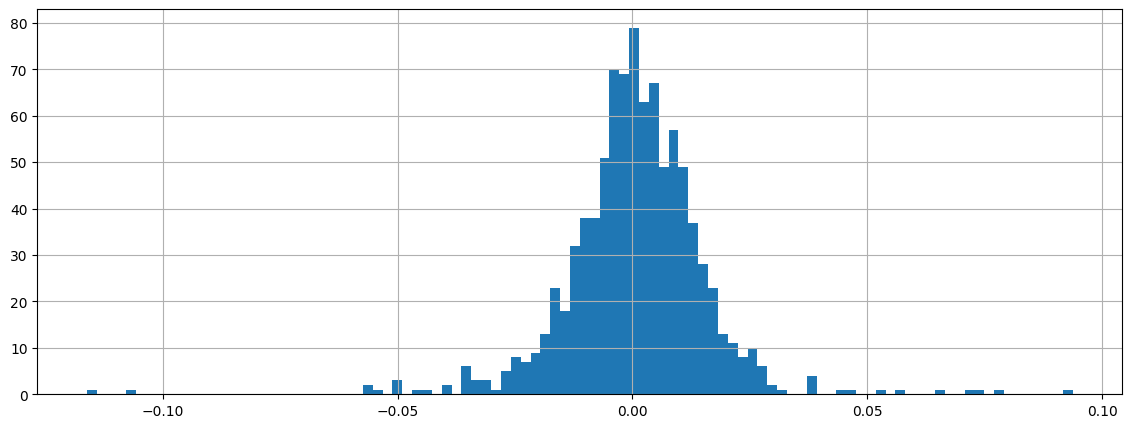

In [34]:
fig, ax = plt.subplots(figsize=(14,5))
retornos_logaritmicos.hist(bins=100, ax=ax)
'''La grafica muestra cuantos dias de nuestro porfafolio tenian cerca de cero
'''

In [35]:
print('Desviacion estandar del portafolio',retornos_logaritmicos.std())
print('Media del portafolio',retornos_logaritmicos.mean())

Desviacion estandar del portafolio 0.015269995827531527
Media del portafolio 0.0006116436680651753


In [36]:
# sharpe_ratio = (retorno de portafolio - tasa libre de riesgo)/desviacion estandar del portafolio
# Se asumirá una tasa libre de riesgo = 0%
sharpe_ratio = retornos_logaritmicos.mean()/retornos_logaritmicos.std()
sharpe_ratio

0.04005526098195736

Sharpe Ratio

Indica que tan rentable es un activo por cada una unidad de riesgo del activo. Ratio que calcula el exceso de retorno por unidad de riesgo. Es un extra que obtiene un inversor por estar expuesto al riesgo.¿Vale la pena? Cuanto mayor sea el Ratio de Sharpe, mejor será el rendimiento histórico de la cartera ajustado al riesgo. Puede utilizarse para comparar directamente dos carteras en función del exceso de rentabilidad que cada una de ellas haya obtenido para un determinado nivel de riesgo.

Los valores aceptables 1 a 2

Annualized Sharpe Ratio



In [37]:
# The NYSE and NASDAQ average about 252 trading days a year
annualized_sharpe_ratio = sharpe_ratio*252**.5
monthy_sharpe_ratio = sharpe_ratio*12**.5
annualized_sharpe_ratio

0.6358575555482882

In [38]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.01392722, 0.36621932, 0.37220319, 0.24765027])

# Simulacion de Monte Carlo y Frontera eficiente

Optimizar portafolio

In [39]:
def roll_dice():
    return np.sum(np.random.randint(1, 7, 2))  # randint(inicial incluye, final excluye, numero de valores)

In [40]:
def monte_carlo_simulation(runs=1000):
    results = np.zeros(2)
    for _ in range(runs):
        if roll_dice() == 7:
            results[0] += 1
        else:
            results[1] += 1
    return results

In [41]:
monte_carlo_simulation()

array([160., 840.])

In [42]:
results = np.array([1,2,3,4,5])
results[3]

4

In [43]:
tickers =['AAPL','WMT','MSFT','IBM','NKE']
start_date= dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start_date)['Adj Close']
data.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,IBM,MSFT,NKE,WMT
Date,,,,,
2020-01-02,73.249031,107.512398,155.093674,98.803711,112.085136
2020-01-03,72.536880,106.654976,153.162506,98.533012,111.095657
2020-01-06,73.114883,106.464439,153.558365,98.446014,110.869492
2020-01-07,72.771027,106.535896,152.158279,98.397690,109.842300
2020-01-08,73.941635,107.425072,154.581924,98.175323,109.465363


In [44]:
retornos_logaritmicos= np.log(data/data.shift())
retornos_logaritmicos

,AAPL,IBM,MSFT,NKE,WMT
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.008007,-0.012530,-0.002744,-0.008867
2020-01-06,0.007937,-0.001788,0.002581,-0.000883,-0.002038
2020-01-07,-0.004714,0.000671,-0.009159,-0.000491,-0.009308
2020-01-08,0.015958,0.008312,0.015803,-0.002262,-0.003438
...,...,...,...,...,...
2023-08-24,-0.026519,0.000976,-0.021733,-0.011407,-0.007683
2023-08-25,0.012564,0.012461,0.009363,0.012318,0.005910
2023-08-28,0.008807,0.004599,0.002227,0.007961,0.005686


In [45]:
weight = np.random.random(5)
weight /= weight.sum()
weight

array([0.26250774, 0.19799783, 0.29143987, 0.07518359, 0.17287096])

In [46]:
retornos_logaritmicos.mean()

AAPL    0.001021
IBM     0.000339
MSFT    0.000816
NKE     0.000036
WMT     0.000395
dtype: float64

In [47]:
rendimiento_esperado = np.sum(retornos_logaritmicos.mean()*weight)*252
rendimiento_esperado

0.1622448463066209

In [48]:
# Matriz covarianza:
retornos_logaritmicos.cov()


,AAPL,IBM,MSFT,NKE,WMT
AAPL,0.000476,0.000174,0.000362,0.000274,0.000138
IBM,0.000174,0.000321,0.000168,0.000180,0.000090
MSFT,0.000362,0.000168,0.000446,0.000264,0.000134
NKE,0.000274,0.000180,0.000264,0.000504,0.000104
WMT,0.000138,0.000090,0.000134,0.000104,0.000229


In [49]:
volatilidad_esperada = np.sqrt(np.dot(weight.T, np.dot(retornos_logaritmicos.cov()*252, weight)))

sharpe_ratio = rendimiento_esperado/volatilidad_esperada
sharpe_ratio

0.6482176211552085

In [50]:
# Simulacion Monte Carlo
n = 5000

weights = np.zeros((n, 5))
rendimiento_esperado = np.zeros(n)
volatilidad_esperada = np.zeros(n)
sharpe_ratios = np.zeros(n)

# riesgo de portafolio ( volatilidad) : 𝜎=√(𝑃∗(𝐶∗𝑃^𝑇))  , P = pesos, C = matriz covarianza, T = transpuesta

for i in range(n):
    weight = np.random.random(5)
    weight /= weight.sum()
    weights[i] = weight

    rendimiento_esperado[i] = np.sum(retornos_logaritmicos.mean()*weight)*252
    volatilidad_esperada[i] = np.sqrt(np.dot(weight.T, np.dot(retornos_logaritmicos.cov()*252, weight)))
    sharpe_ratios[i] = rendimiento_esperado[i] / volatilidad_esperada[i]



In [51]:
sharpe_ratios.max()

0.7408090569468433

In [52]:
sharpe_ratios.argmax()

2329

In [53]:
# Proporcion en cada activo del portafolio
weights[sharpe_ratios.argmax()]

array([0.57914472, 0.05562855, 0.13732212, 0.0084216 , 0.21948301])

Text(0, 0.5, 'Retorno Esperado')

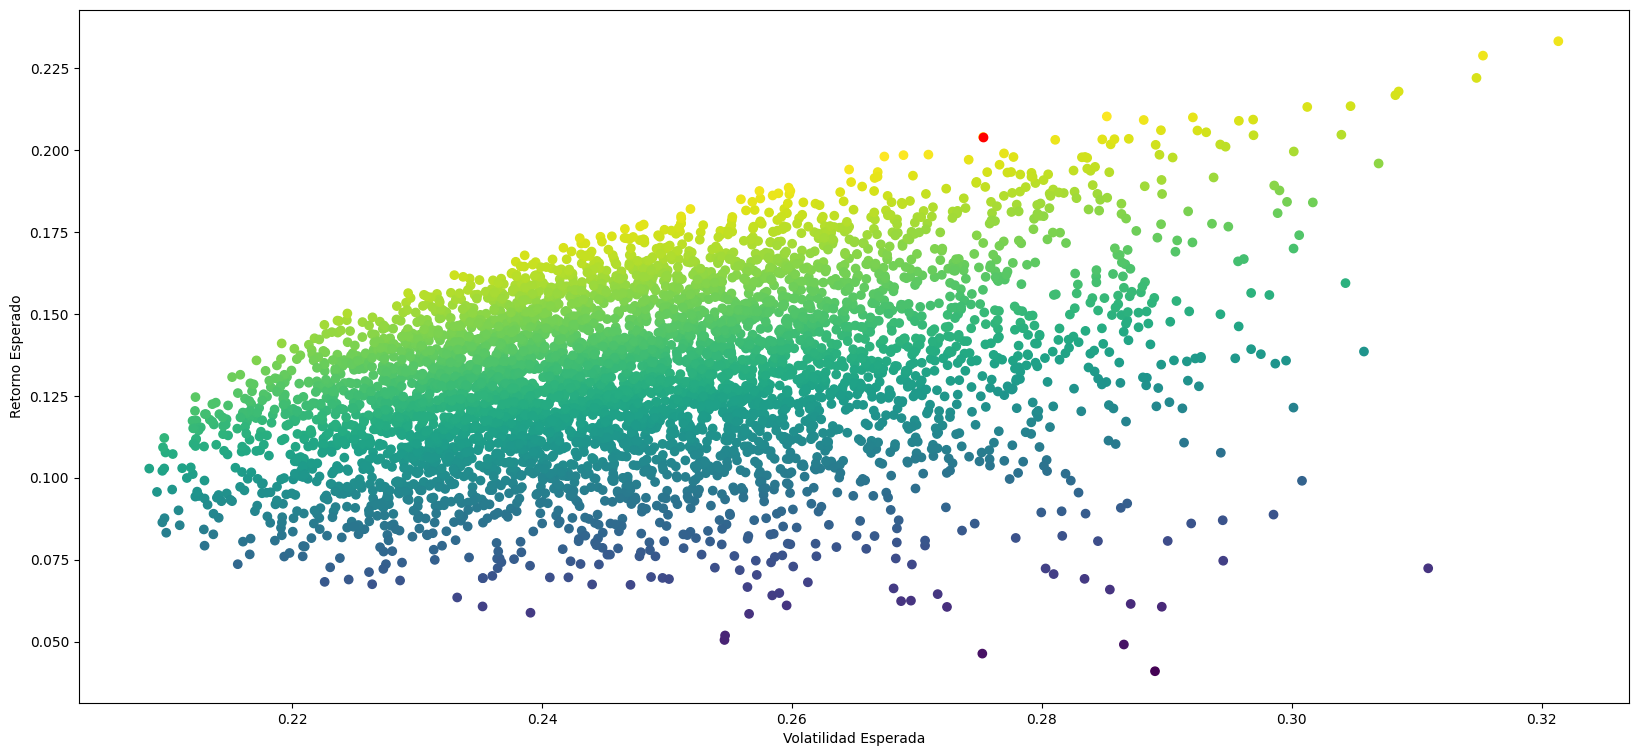

In [54]:
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter(volatilidad_esperada, rendimiento_esperado, c=sharpe_ratios)
ax.scatter(volatilidad_esperada[sharpe_ratios.argmax()], rendimiento_esperado[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Volatilidad Esperada')
ax.set_ylabel('Retorno Esperado')

# Correlacion

Correlation https://www.investopedia.com/terms/c/correlation.asp

SP500 by Market Cap https://www.slickcharts.com/sp500



* La correlación mide la asociación, pero no muestra si x causa y o viceversa
* La correlación es una estadística que mide el grado en que dos variables se mueven entre sí.
* En finanzas, la correlación puede medir el movimiento de una acción con el de un índice de referencia, como el S&P 500.

-----
* r oscila entre -1 y 1 (ambos inclusive)
* r=1: Correlación positiva perfecta
* r=-1: Correlación negativa perfecta
* r=0: Ninguna correlación

In [55]:
tickers =['AAPL','WMT','MSFT','IBM','NKE']
start_date= dt.datetime(2020,1,1)
end_date=dt.datetime(2023,1,1)
data = pdr.get_data_yahoo(tickers,start_date,end_date)['Adj Close']
data.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,IBM,MSFT,NKE,WMT
Date,,,,,
2020-01-02,73.249023,107.512398,155.093658,98.803734,112.085136
2020-01-03,72.536888,106.654976,153.162460,98.533020,111.095650
2020-01-06,73.114891,106.464455,153.558365,98.446014,110.869476
2020-01-07,72.771027,106.535889,152.158295,98.397682,109.842278
2020-01-08,73.941628,107.425087,154.581924,98.175339,109.465363


In [56]:
retornos_logaritmicos = np.log(data/data.shift())
retornos_logaritmicos

# otra forma
log_returns = np.log(1+data.pct_change())

In [57]:
# Matriz de correlacion
retornos_logaritmicos.corr()

,AAPL,IBM,MSFT,NKE,WMT
AAPL,1.000000,0.462646,0.814055,0.578178,0.429222
IBM,0.462646,1.000000,0.479876,0.463781,0.332733
MSFT,0.814055,0.479876,1.000000,0.591172,0.443654
NKE,0.578178,0.463781,0.591172,1.000000,0.308155
WMT,0.429222,0.332733,0.443654,0.308155,1.000000


In [58]:
sp500 = pdr.get_data_yahoo("^GSPC", start_date)
sp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000
...,...,...,...,...,...,...
2023-08-24,4455.160156,4458.299805,4375.549805,4376.310059,4376.310059,3723470000
2023-08-25,4389.379883,4418.459961,4356.290039,4405.709961,4405.709961,3296180000
2023-08-28,4426.029785,4439.560059,4414.979980,4433.310059,4433.310059,2957230000


In [59]:
# Retornos logartimicos de Sp500
retornos_logaritmicos['SP500'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift())
retornos_logaritmicos

,AAPL,IBM,MSFT,NKE,WMT,SP500
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.008007,-0.012530,-0.002744,-0.008867,-0.007085
2020-01-06,0.007937,-0.001788,0.002582,-0.000883,-0.002038,0.003527
2020-01-07,-0.004714,0.000671,-0.009159,-0.000491,-0.009308,-0.002807
2020-01-08,0.015958,0.008312,0.015803,-0.002262,-0.003437,0.004890
...,...,...,...,...,...,...
2022-12-23,-0.002802,0.005451,0.002265,-0.003949,0.002019,0.005851
2022-12-27,-0.013976,0.005421,-0.007442,0.011206,0.000278,-0.004058
2022-12-28,-0.031166,-0.016995,-0.010308,-0.022191,-0.017678,-0.012093


In [60]:
retornos_logaritmicos.corr()

,AAPL,IBM,MSFT,NKE,WMT,SP500
AAPL,1.000000,0.462646,0.814055,0.578178,0.429222,0.826621
IBM,0.462646,1.000000,0.479876,0.463781,0.332733,0.678592
MSFT,0.814055,0.479876,1.000000,0.591172,0.443654,0.860257
NKE,0.578178,0.463781,0.591172,1.000000,0.308155,0.719668
WMT,0.429222,0.332733,0.443654,0.308155,1.000000,0.480802
SP500,0.826621,0.678592,0.860257,0.719668,0.480802,1.000000


In [61]:
def test_correlation(ticker):
    df = pdr.get_data_yahoo(ticker, start_date)
    retor_log_copy = retornos_logaritmicos.copy()
    retor_log_copy[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
    return retor_log_copy.corr()

In [62]:
test_correlation('TLT') # TLT = ETF bonos del Tesoro a más de 20 años

[*********************100%%**********************]  1 of 1 completed


,AAPL,IBM,MSFT,NKE,WMT,SP500,TLT
AAPL,1.000000,0.462646,0.814055,0.578178,0.429222,0.826621,-0.158608
IBM,0.462646,1.000000,0.479876,0.463781,0.332733,0.678592,-0.273833
MSFT,0.814055,0.479876,1.000000,0.591172,0.443654,0.860257,-0.135629
NKE,0.578178,0.463781,0.591172,1.000000,0.308155,0.719668,-0.139089
WMT,0.429222,0.332733,0.443654,0.308155,1.000000,0.480802,-0.120241
SP500,0.826621,0.678592,0.860257,0.719668,0.480802,1.000000,-0.233172
TLT,-0.158608,-0.273833,-0.135629,-0.139089,-0.120241,-0.233172,1.000000


In [63]:
def visualize_correlation(ticker1, ticker2):
    df = pdr.get_data_yahoo([ticker1, ticker2], start_date)['Adj Close']
    df = df/df.iloc[0]
    fig, ax = plt.subplots(figsize=(20,9))
    df.plot(ax=ax) # adquiere los label de los 2 activos
    print(df)

[*********************100%%**********************]  2 of 2 completed
                AAPL       TLT
Date                          
2020-01-02  1.000000  1.000000
2020-01-03  0.990278  1.015400
2020-01-06  0.998168  1.009635
2020-01-07  0.993474  1.004671
2020-01-08  1.009455  0.998030
...              ...       ...
2023-08-24  2.407950  0.744074
2023-08-25  2.438394  0.746505
2023-08-28  2.459964  0.747289
2023-08-29  2.513617  0.755050
2023-08-30  2.561808  0.754266

[922 rows x 2 columns]


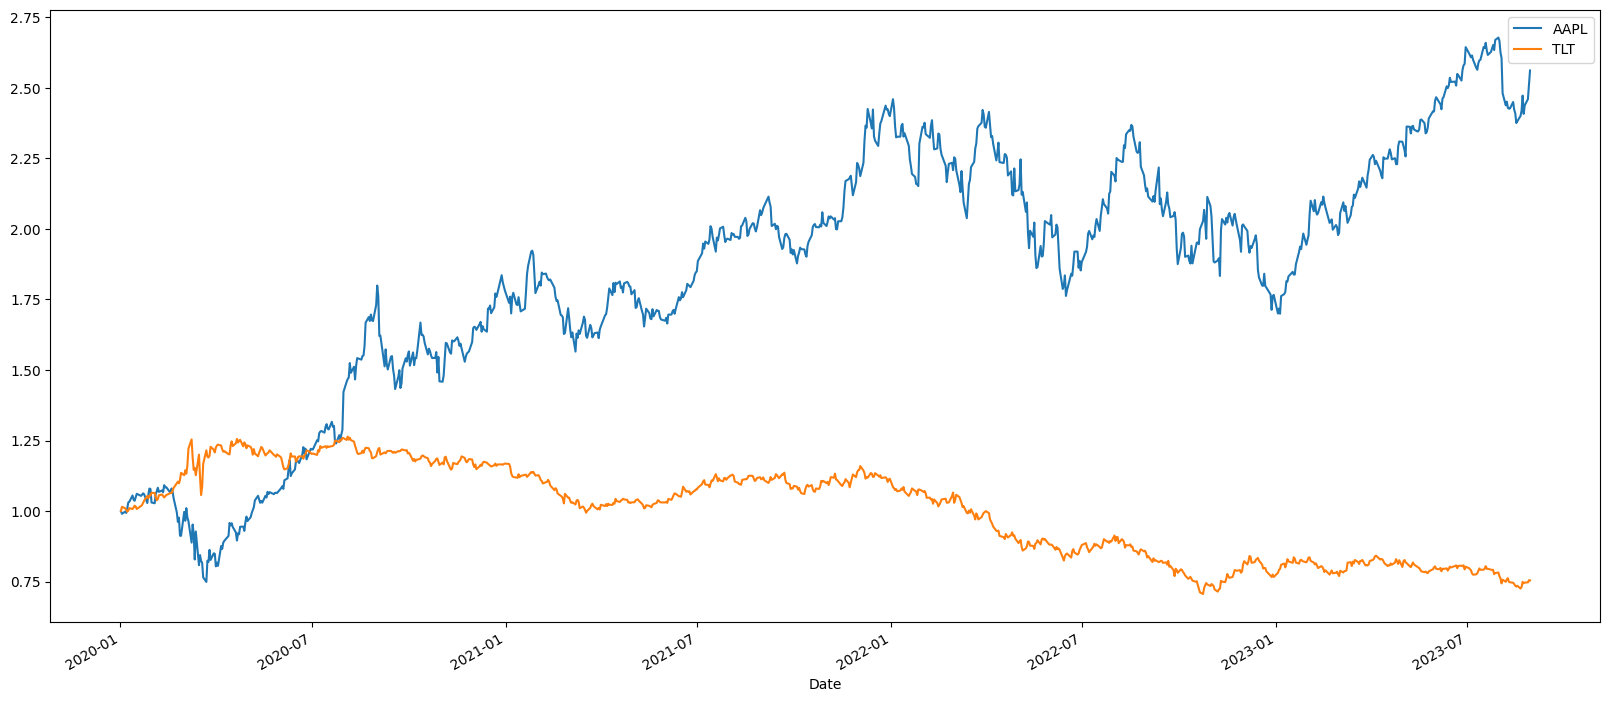

In [64]:
visualize_correlation('AAPL','TLT')

[*********************100%%**********************]  2 of 2 completed
                 TLT     ^GSPC
Date                          
2020-01-02  1.000000  1.000000
2020-01-03  1.015400  0.992940
2020-01-06  1.009634  0.996449
2020-01-07  1.004671  0.993655
2020-01-08  0.998029  0.998527
...              ...       ...
2023-08-24  0.744074  1.343312
2023-08-25  0.746504  1.352337
2023-08-28  0.747288  1.360808
2023-08-29  0.755050  1.380552
2023-08-30  0.754266  1.385843

[922 rows x 2 columns]


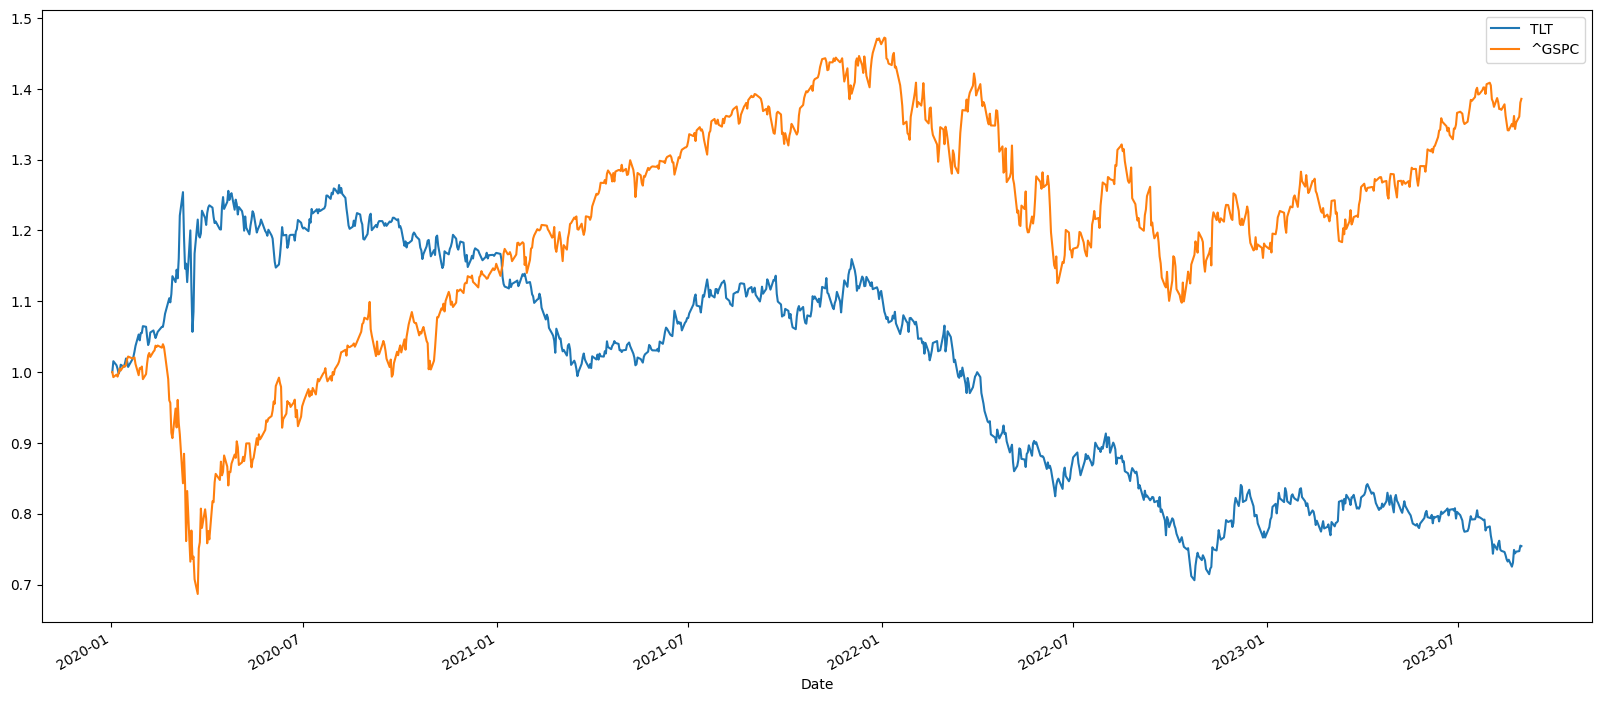

In [65]:
visualize_correlation("^GSPC", "TLT")

# Regresión Lineal

In [66]:
retornos_logaritmicos

,AAPL,IBM,MSFT,NKE,WMT,SP500
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.008007,-0.012530,-0.002744,-0.008867,-0.007085
2020-01-06,0.007937,-0.001788,0.002582,-0.000883,-0.002038,0.003527
2020-01-07,-0.004714,0.000671,-0.009159,-0.000491,-0.009308,-0.002807
2020-01-08,0.015958,0.008312,0.015803,-0.002262,-0.003437,0.004890
...,...,...,...,...,...,...
2022-12-23,-0.002802,0.005451,0.002265,-0.003949,0.002019,0.005851
2022-12-27,-0.013976,0.005421,-0.007442,0.011206,0.000278,-0.004058
2022-12-28,-0.031166,-0.016995,-0.010308,-0.022191,-0.017678,-0.012093


In [67]:
def linear_regression(ticker_a, ticker_b):
    X = retornos_logaritmicos[ticker_a].iloc[1:].to_numpy().reshape(-1, 1) # iloc[1:] la primera fila tiene NaN. reshape : se necesita 1 columna
    Y = retornos_logaritmicos[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)

    lin_regr = LinearRegression()
    lin_regr.fit(X, Y)

    Y_pred = lin_regr.predict(X)

    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0, 0]

    fig, ax = plt.subplots(figsize=(20,9))
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta: " + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c='r')

In [ ]:
beta, alpha = np.polyfit(retornos_logaritmicos['SP500'], retornos_logaritmicos['AAPL'], 1)
print(beta,alpha)

In [ ]:
linear_regression("AAPL", "SP500")

In [ ]:
linear_regression("AAPL", "WMT")

# Beta

beta = covarianza/varianza

* Beta es una medida de la volatilidad de una acción en relación con el mercado global.
* El índice S&P 500 tiene una beta de 1,0.
* Se supone que los valores con una beta alta son más arriesgados, pero ofrecen un mayor potencial de rentabilidad.
* Los valores de beta baja presentan menos riesgo, pero también menor rentabilidad.


Interpretación:

* Beta superior a 1: acción más volátil que el mercado, pero de la que se espera una mayor rentabilidad
* Beta inferior a 1: acción con menor volatilidad, y espera menos rentabilidad

In [69]:
tickers =['AAPL','WMT','MSFT','NKE','^GSPC']
start_date= dt.datetime(2018,1,1)
end_date=dt.datetime(2023,1,1)
data = pdr.get_data_yahoo(tickers,start_date,end_date)['Adj Close'] #interval='1m'
data.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,MSFT,NKE,WMT,^GSPC
Date,,,,,
2018-01-02,40.776524,80.391830,60.058407,88.952415,2695.810059
2018-01-03,40.769421,80.765984,60.048939,89.728333,2713.060059
2018-01-04,40.958794,81.476837,60.011101,89.809532,2723.989990
2018-01-05,41.425133,82.486992,60.521923,90.341843,2743.149902
2018-01-08,41.271267,82.571167,61.061115,91.677177,2747.709961


In [70]:
retornos_logaritmicos = np.log(data/data.shift())
retornos_logaritmicos

,AAPL,MSFT,NKE,WMT,^GSPC
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.004643,-0.000158,0.008685,0.006378
2018-01-04,0.004634,0.008763,-0.000630,0.000905,0.004021
2018-01-05,0.011321,0.012322,0.008476,0.005910,0.007009
2018-01-08,-0.003721,0.001020,0.008870,0.014673,0.001661
...,...,...,...,...,...
2022-12-23,-0.002802,0.002265,-0.003949,0.002019,0.005851
2022-12-27,-0.013976,-0.007442,0.011206,0.000278,-0.004058
2022-12-28,-0.031166,-0.010308,-0.022191,-0.017678,-0.012093


In [71]:
matriz_covarianza = retornos_logaritmicos.cov()
matriz_covarianza


,AAPL,MSFT,NKE,WMT,^GSPC
AAPL,0.000445,0.000320,0.000240,0.000119,0.000235
MSFT,0.000320,0.000383,0.000238,0.000122,0.000232
NKE,0.000240,0.000238,0.000440,0.000097,0.000204
WMT,0.000119,0.000122,0.000097,0.000220,0.000098
^GSPC,0.000235,0.000232,0.000204,0.000098,0.000191


In [72]:
varianza_sp500 = retornos_logaritmicos['^GSPC'].var()
varianza_sp500


0.00019143499778179882

In [73]:
# CALCULO DE BETA
# covarianza entre apple y sp500 entre varianza de sp500
beta = matriz_covarianza.loc['AAPL','^GSPC']/varianza_sp500
beta

1.2251248338500236

In [74]:
# BETA DE TODAS LAS ACCIONES
matriz_covarianza.loc['^GSPC']/varianza_sp500


AAPL     1.225125
MSFT     1.211113
NKE      1.065762
WMT      0.510724
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [75]:
X = retornos_logaritmicos['^GSPC'].iloc[1:].to_numpy().reshape(-1, 1)
Y = retornos_logaritmicos['AAPL'].iloc[1:].to_numpy().reshape(-1, 1)

lin_regr = LinearRegression()
lin_regr.fit(X, Y)

lin_regr.coef_[0, 0]

1.2251248338500225

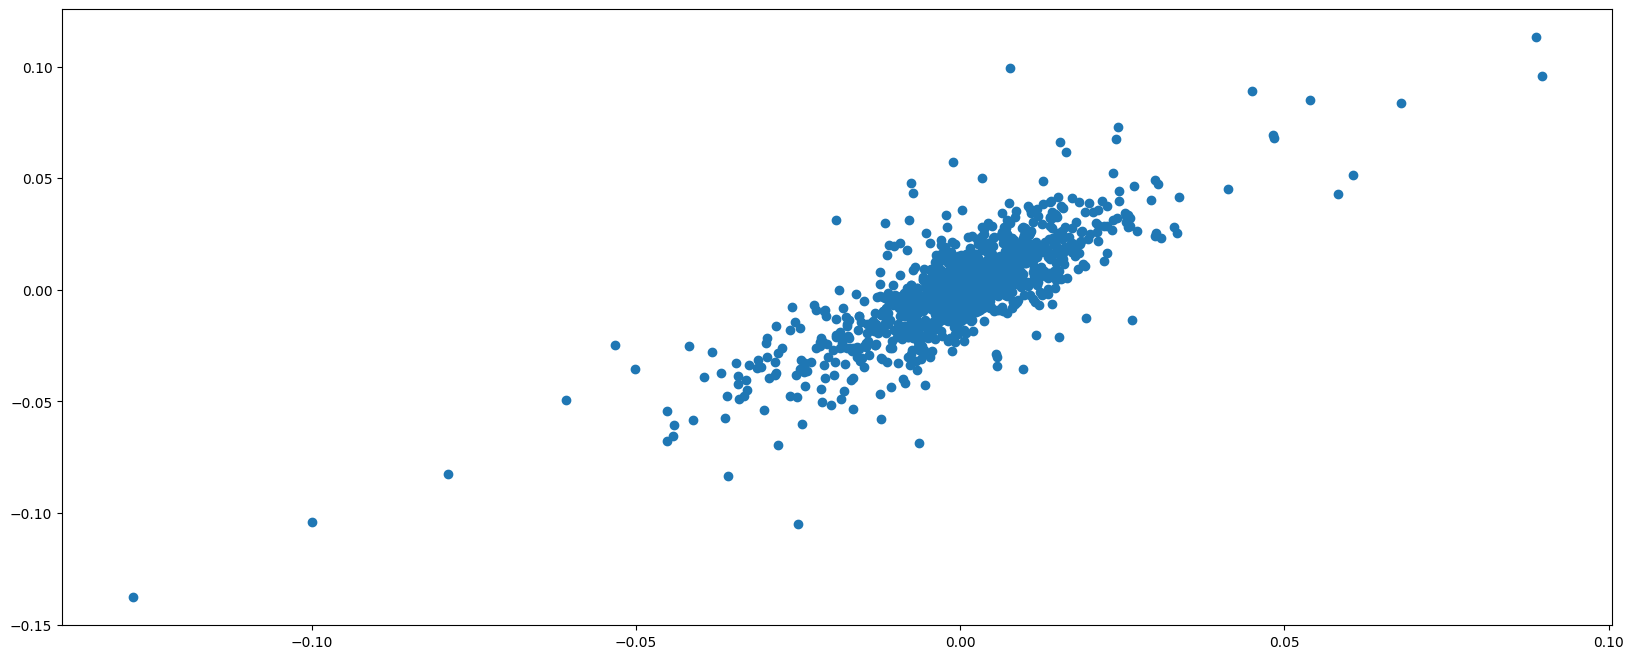

In [76]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(X, Y)

# CAPM

In [77]:
retornos_logaritmicos = np.log(data/data.shift())
matriz_covarianza = retornos_logaritmicos.cov()
matriz_covarianza


,AAPL,MSFT,NKE,WMT,^GSPC
AAPL,0.000445,0.000320,0.000240,0.000119,0.000235
MSFT,0.000320,0.000383,0.000238,0.000122,0.000232
NKE,0.000240,0.000238,0.000440,0.000097,0.000204
WMT,0.000119,0.000122,0.000097,0.000220,0.000098
^GSPC,0.000235,0.000232,0.000204,0.000098,0.000191


In [78]:
varianza_sp500 = retornos_logaritmicos['^GSPC'].var()
varianza_sp500

0.00019143499778179882

In [79]:
# BETA DE APPLE
beta = matriz_covarianza.loc['AAPL', '^GSPC']/varianza_sp500
beta

1.2251248338500236

In [80]:
tasa_libre_riesgo = 0.0138
rendimiento_mercado = .105
retorno_esperado = tasa_libre_riesgo + beta*(rendimiento_mercado - tasa_libre_riesgo)
retorno_esperado

0.12553138484712215

In [81]:
betas_portafolio= matriz_covarianza.loc['^GSPC']/varianza_sp500
betas_portafolio

AAPL     1.225125
MSFT     1.211113
NKE      1.065762
WMT      0.510724
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [82]:
capm_activos = tasa_libre_riesgo + betas_portafolio*(rendimiento_mercado - tasa_libre_riesgo)
capm_activos

AAPL     0.125531
MSFT     0.124254
NKE      0.110998
WMT      0.060378
^GSPC    0.105000
Name: ^GSPC, dtype: float64